# Build, Train, and Evaluate Neural Networks for a Binary Classification Task

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Phase 1: Data Analysis & Preparation

Data source: Rabie El Kharoua. (2024). 🛍️ Predict Customer Purchase Behavior Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8725150

In [15]:
# load dataset
X = pd.read_csv("data\\customer_purchase_data.csv").iloc[:, :-2]
y = pd.read_csv("data\\customer_purchase_data.csv").iloc[:, [-1]]

In [16]:
X.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram
0,40,1,66120.267939,8,0,30.568601,0
1,20,1,23579.773583,4,2,38.240097,0
2,27,1,127821.306432,11,2,31.633212,1
3,24,1,137798.623120,19,3,46.167059,0
4,31,1,99300.964220,19,1,19.823592,0


In [17]:
y.head()

,PurchaseStatus
0,1
1,0
2,1
3,1
4,1


Min-max normalize the data.

In [18]:
# min-max normalize 
X_norm = (X-X.min())/(X.max()-X.min())
X_norm.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram
0,0.423077,1.0,0.355351,0.40,0.00,0.500925,0.0
1,0.038462,1.0,0.027571,0.20,0.50,0.631052,0.0
2,0.173077,1.0,0.830766,0.55,0.50,0.518983,1.0
3,0.115385,1.0,0.907642,0.95,0.75,0.765512,0.0
4,0.250000,1.0,0.611013,0.95,0.25,0.318664,0.0


Visualize the distribution of each feature. The first plot contains the distributions before normalization. The second plot conatins the distributions after normalization.

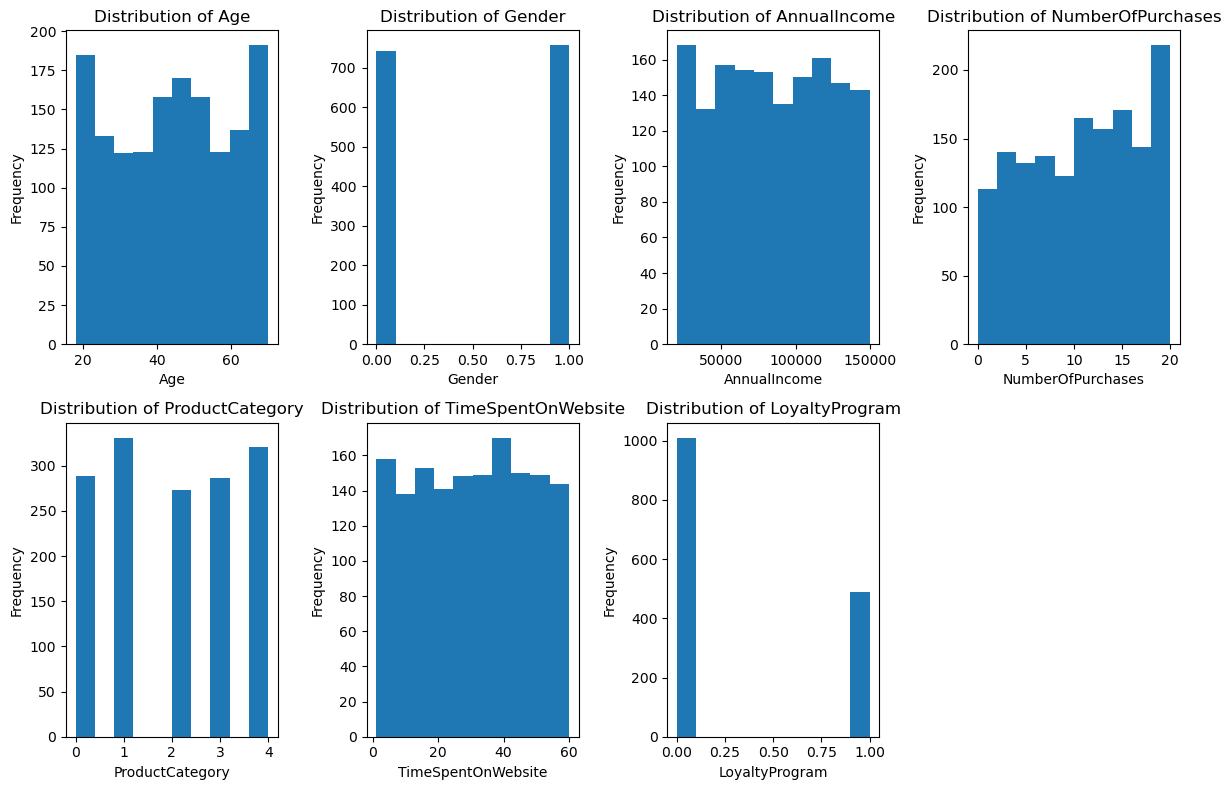

In [26]:
# visualizations before normalization
fig, axs = plt.subplots(2, 4, figsize=(12, 8))
a = axs.ravel()
for idx, ax in enumerate(a):
    if idx == 7:
        fig.delaxes(ax)
        break
    col = X.columns[idx]
    ax.hist(X[col])
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('distribution_of_features.png')
plt.show()

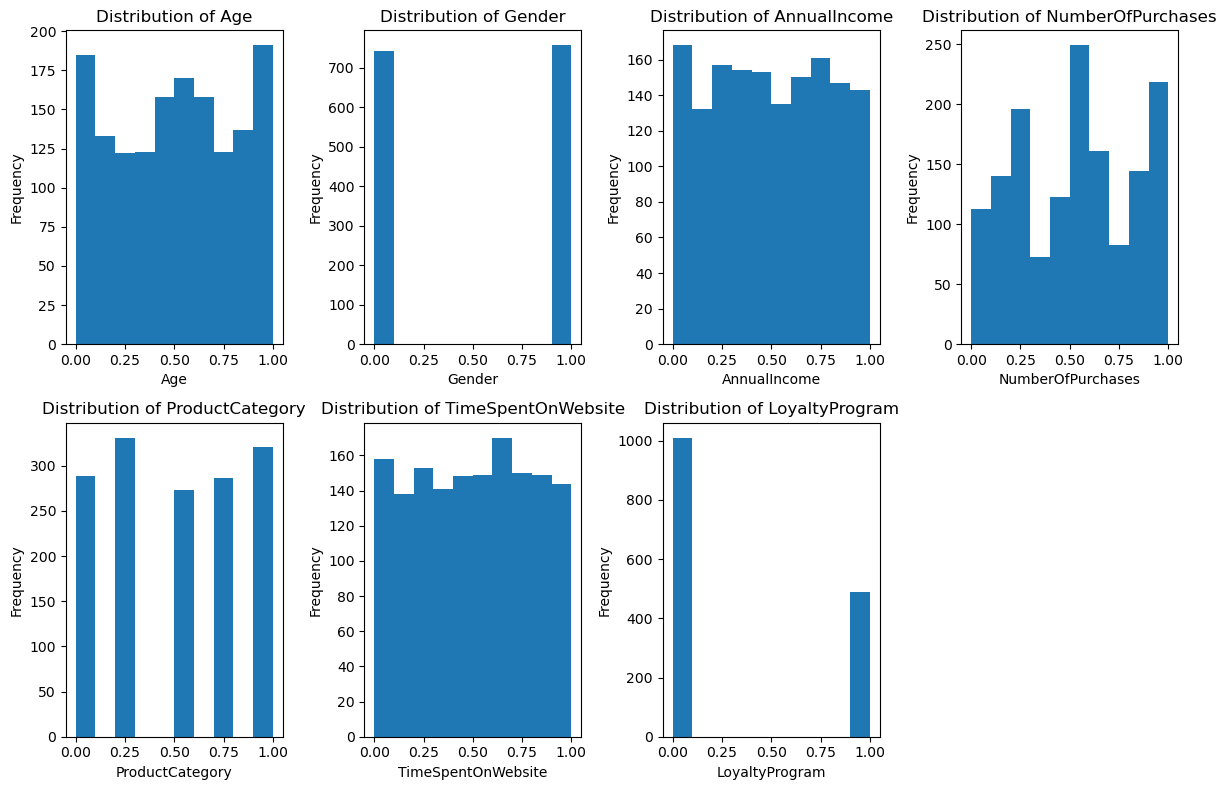

In [27]:
# visualizations after normalization
fig, axs = plt.subplots(2, 4, figsize=(12, 8))
a = axs.ravel()
for idx, ax in enumerate(a):
    if idx == 7:
        fig.delaxes(ax)
        break
    col = X_norm.columns[idx]
    ax.hist(X_norm[col])
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('distribution_of_normalized_features.png')
plt.show()

Describe the range of the values of the features, including mean, median, minimum, and maximum.

In [28]:
# range of values
for col in X.columns:
    print(f'The mean of {col} is {round(X[col].mean(), 2)}.')
    print(f'The median of {col} is {round(X[col].median(), 2)}.')
    print(f'The mininimum value of {col} is {round(X[col].min(), 2)}.')
    print(f'The maximum value of {col} is {round(X[col].max(), 2)}.')
    print('=====================================================')

The mean of Age is 44.3.
The median of Age is 45.0.
The mininimum value of Age is 18.
The maximum value of Age is 70.
The mean of Gender is 0.5.
The median of Gender is 1.0.
The mininimum value of Gender is 0.
The maximum value of Gender is 1.
The mean of AnnualIncome is 84249.16.
The median of AnnualIncome is 83699.58.
The mininimum value of AnnualIncome is 20001.51.
The maximum value of AnnualIncome is 149785.18.
The mean of NumberOfPurchases is 10.42.
The median of NumberOfPurchases is 11.0.
The mininimum value of NumberOfPurchases is 0.
The maximum value of NumberOfPurchases is 20.
The mean of ProductCategory is 2.01.
The median of ProductCategory is 2.0.
The mininimum value of ProductCategory is 0.
The maximum value of ProductCategory is 4.
The mean of TimeSpentOnWebsite is 30.47.
The median of TimeSpentOnWebsite is 30.94.
The mininimum value of TimeSpentOnWebsite is 1.04.
The maximum value of TimeSpentOnWebsite is 59.99.
The mean of LoyaltyProgram is 0.33.
The median of LoyaltyPr

Check the distribution of the target to make sure it's not imbalanced.

In [22]:
# checking distribution of output
perc_zero = round((len(y[y['PurchaseStatus']==0]) / len(y))*100, 2)
print(f'The percentage of purchase is {perc_zero}%')
print(f'The percentage of no purchase is {100 - perc_zero}%')

The percentage of purchase is 56.8%
The percentage of no purchase is 43.2%
